## Final Project - Andrew Johnson (Correlations and Anti-Correlations of Stocks)

For my project, I had to pick a pair of stocks to observe and at first I couldn't really think of any interesting linked stories that might have been interesting. The majority of the things I remembered I wasn't 100% sure would be strongly linked (although as I write this I began to think of more but on a much shorter time frame). I asked a friend but then my mind immediately went back to the most recent financial debacle and therefore I chose 2 of the big players in the subprime mortgage crisis of 2008 Fannie Mae and Wells Fargo. This project is looking at the correlation and anti-correlation between those two stocks. I use data analysis methods to gather information and then I opine on my findings with whatever finance expertise and knowledge of history I may have.

In [4]:
import matplotlib.pyplot as plt
import yfinance as yf

In [79]:
#Wells Fargo and FANNIE MAE in the 2008 period (Financial Crash)
FNMA = yf.download("FNMA", '2008-01-01','2009-01-01')
WFC = yf.download("WFC", '2008-01-01','2009-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


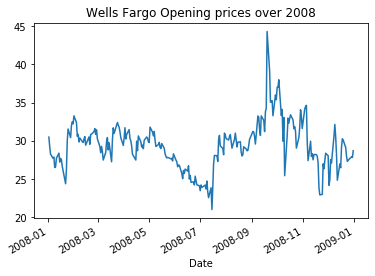

In [80]:
WFC.Open.plot()
plt.title("Wells Fargo Opening prices over 2008")
plt.show()

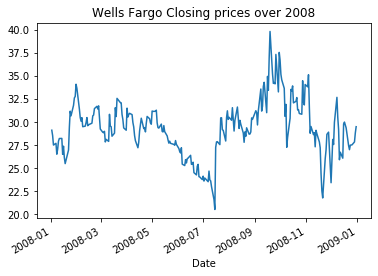

In [81]:
WFC.Close.plot()
plt.title("Wells Fargo Closing prices over 2008")
plt.show()

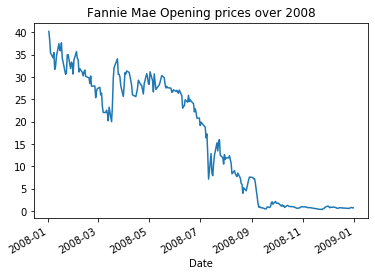

In [83]:
FNMA.Open.plot()
plt.title("Fannie Mae Opening prices over 2008")
plt.show()

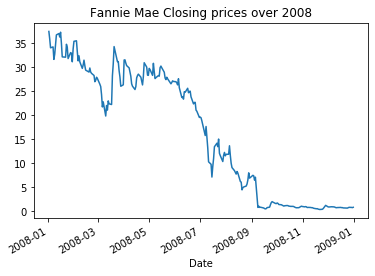

In [84]:
FNMA.Close.plot()
plt.title("Fannie Mae Closing prices over 2008")
plt.show()

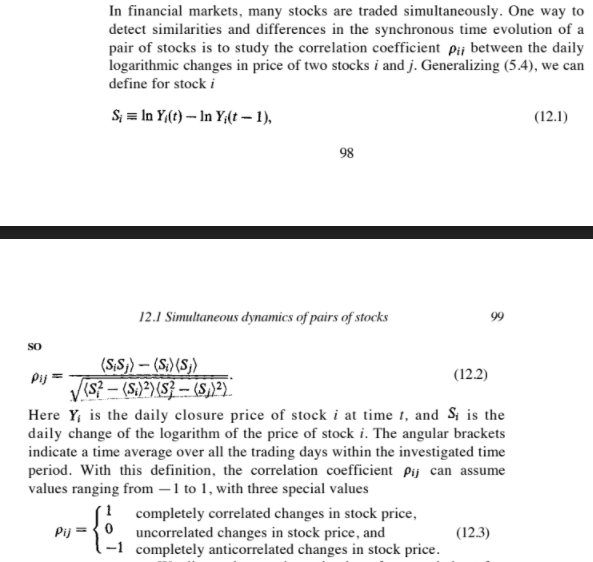

In [43]:
#This will be Sw
WFC = WFC.Close

In [44]:
WFC.head()

Date
2008-01-02    29.10
2008-01-03    28.52
2008-01-04    27.49
2008-01-07    27.68
2008-01-08    26.50
Name: Close, dtype: float64

In [45]:
#This will be Sf
FNMA = FNMA.Close

In [46]:
FNMA.head()

Date
2008-01-02    37.459999
2008-01-03    35.919998
2008-01-04    34.049999
2008-01-07    34.230000
2008-01-08    31.629999
Name: Close, dtype: float64

In [31]:
import math 

In [50]:
Yw = []
Yf = []
for i in range(len(WFC)):
    Yw.append(math.log(WFC[i]))
    Yf.append(math.log(FNMA[i]))

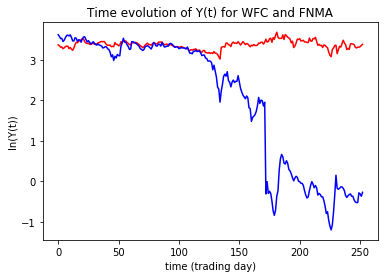

In [56]:
import matplotlib.pyplot as plt
plt.plot(Yw, color = 'red')
plt.plot(Yf, color = 'blue')
plt.title("Time evolution of Y(t) for WFC and FNMA in 2008")
plt.ylabel("ln(Y(t))")
plt.xlabel("time (trading day)")
plt.show()

In [57]:
#We will now construct Sw and Sf to compute pij values
Sw = []
Sf = []
for i in range(len(WFC)):
    """if i == 0:
        Sw.append(WFC[0])
        Sf.append(FNMA[0])"""
    Sw.append(math.log(WFC[i]) - math.log(WFC[i-1]))
    Sf.append(math.log(FNMA[i]) - math.log(FNMA[i-1]))

In [58]:
import numpy as np
Sw = np.array(Sw)
Sf = np.array(Sf)

In [76]:
#Average of each logarithmic difference list
ExpSw = np.mean(Sw)
ExpSf = np.mean(Sf)
print("Expectation of Sw: {} and Sf: {}".format(ExpSw, ExpSf))

Expectation of Sw: 0.0 and Sf: 0.0


Something of note is occuring here and that is that these expectations may be saying that if you were to observe these stocks over a large period of time the price wouldn't change much on either of them. This is strange because Fannie Mae absolutely collapsed from a price of around 40 USD to 2 USD. I think a possible explanation is that for each day where the closing price increased there was a equal and opposite day (where the stock decreased) but this masks the behavior of the stock and in my opinion seems a bit inconsistent with what the graph Y(t) is showing although that shows the time evolution rather than the difference in days.

In [85]:
#Average of the squared values of each logarithmic Y(t) list
ExpSwSq = np.mean(np.power(Sw,2))
ExpSfSq = np.mean(np.power(Sf,2))
print("Expected value of squared elements - Sw: {} and Sf: {}".format(ExpSwSq, ExpSfSq))

Expected value of squared elements - Sw: 0.0026213735628141262 and Sf: 0.09291340370338513


In [68]:
#Getting covariance values
SfSw = []
for i in range(len(WFC)):
    SfSw.append(Sf[i]*Sw[i])

In [74]:
ExpSfSw = np.mean(SfSw)
print("Expected Covariance: ", ExpSfSw)

Expected Covariance:  0.0013588829291433693


In [73]:
#Getting the pij value for the year 2008-2009
#Numerator (Variance of the pair as an entity)
num = ExpSfSw - (ExpSw * ExpSf)
#Denominator (Dividing by the standard deviation of each stock)
den = math.sqrt(ExpSwSq - ExpSw**2) * math.sqrt(ExpSfSq - ExpSf**2)
#Combining the two to get pij
pij = num/den
print("Correlation: ", pij)

Correlation:  0.08707197599262911


The pij value that we attained is 0.08707197599262911 which shows that there is a very weak correlation between the stocks of Wells Fargo and Fannie Mae in the 2008-2009 period which is famous for the housing market crash which affected both of these companies greatly to my knowledge. The weak correlation is honestly something I find interesting. Let's try and see what happens during other years!

In [86]:
#Wells Fargo and FANNIE MAE in the 2007 period (Pre-Crash) 
FNMA = yf.download("FNMA", '2007-01-01','2008-01-01')
WFC = yf.download("WFC", '2007-01-01','2008-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


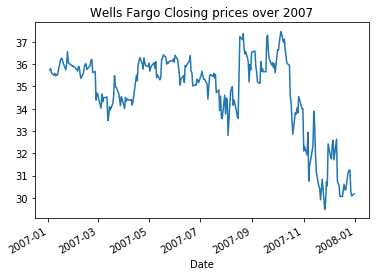

In [87]:
WFC.Close.plot()
plt.title("Wells Fargo Closing prices over 2007")
plt.show()

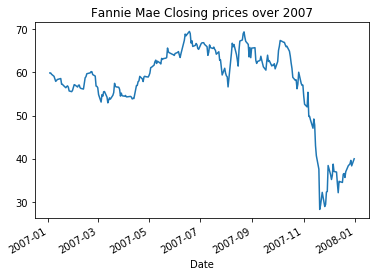

In [88]:
FNMA.Close.plot()
plt.title("Fannie Mae Closing prices over 2007")
plt.show()

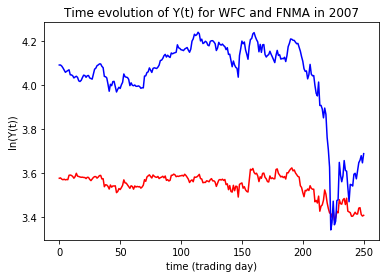

In [89]:
#This will be Sw
WFC = WFC.Close
#This will be Sf
FNMA = FNMA.Close
Yw = []
Yf = []
for i in range(len(WFC)):
    Yw.append(math.log(WFC[i]))
    Yf.append(math.log(FNMA[i]))

plt.plot(Yw, color = 'red')
plt.plot(Yf, color = 'blue')
plt.title("Time evolution of Y(t) for WFC and FNMA in 2007")
plt.ylabel("ln(Y(t))")
plt.xlabel("time (trading day)")
plt.show()

Something to note here is that the time evolution graph for 2007 and 2008 look drastically different which sort of makes sense since in 2008 Fannie Mae was holding on until it collapsed while Wells Fargo has some resistance levels and ended the year on an uptrend from what I saw

In [90]:
#We will now construct Sw and Sf to compute pij values
Sw = []
Sf = []
for i in range(len(WFC)):
    """if i == 0:
        Sw.append(WFC[0])
        Sf.append(FNMA[0])"""
    Sw.append(math.log(WFC[i]) - math.log(WFC[i-1]))
    Sf.append(math.log(FNMA[i]) - math.log(FNMA[i-1]))
    
#Converting to numpy arrays to work with the data easier
Sw = np.array(Sw)
Sf = np.array(Sf)

#Average of each logarithmic Y(t) list
ExpSw = np.mean(Sw)
ExpSf = np.mean(Sf)
print("Expectation of Sw: {}, Expectation of Sf: {}".format(ExpSw, ExpSf))
print()

#Average of the squared values of each logarithmic Y(t) list
ExpSwSq = np.mean(np.power(Sw,2))
ExpSfSq = np.mean(np.power(Sf,2))
print("Expectation of the squared values of Sw: {} and Sf: {}".format(ExpSwSq, ExpSfSq))
print()

#Getting covariance values
SfSw = []
for i in range(len(WFC)):
    SfSw.append(Sf[i]*Sw[i])

#Getting the expectation of the covariance
ExpSfSw = np.mean(SfSw)
print("Expectation of the covariance: ", ExpSfSw)
print()

#Numerator (Variance of the pair as an entity)
num = ExpSfSw - (ExpSw * ExpSf)
#Denominator (Dividing by the standard deviation of each stock)
den = math.sqrt(ExpSwSq - ExpSw**2) * math.sqrt(ExpSfSq - ExpSf**2)
#Combining the two to get pij
pij = num/den
print("Correlation: ", pij)

Expectation of Sw: 0.0, Expectation of Sf: 0.0

Expectation of the squared values of Sw: 0.0004015118181454828 and Sf: 0.001841311804649463

Expectation of the covariance:  0.0006372461408763508

Correlation:  0.7411299754671521


In my opinion this is very, very interesting. Before the crash, we can observe an incredibly high correlation between the two stocks, a 74% correlation to be exact. During the crash, this falls tremendously to 0.08707197599262911. So we observe an 87% fall in correlation between the two stocks. In my eyes, an important question to ask is what happened and what created the disconnect between the stocks once the crash occured. One thing that I think of is that Wells Fargo is probably more diversified than Fannie Mae was since Wells Fargo is a bank and Fannie Mae was directly tied to the housing market. Stocks are valued as the summation of their future cash flows and when the housing market collapsed Fannie Mae's only source of income died out while Wells Fargo still had other operational divisions even if they got some scars trying to hold on during the collapse. Moving on to 2009.

In [91]:
#Wells Fargo and FANNIE MAE in the 2009 period (Post-Crash) 
FNMA = yf.download("FNMA", '2009-01-01','2010-01-01')
WFC = yf.download("WFC", '2009-01-01','2010-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


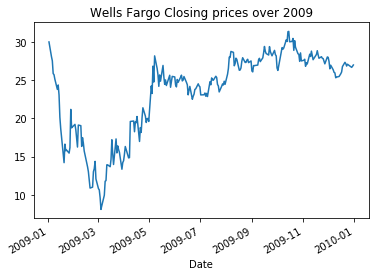

In [92]:
WFC.Close.plot()
plt.title("Wells Fargo Closing prices over 2009")
plt.show()

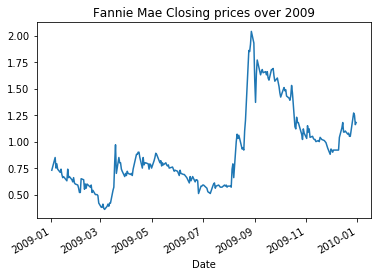

In [93]:
FNMA.Close.plot()
plt.title("Fannie Mae Closing prices over 2009")
plt.show()

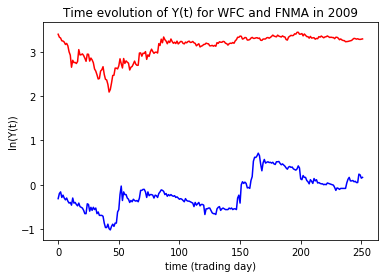

In [94]:
#This will be Sw
WFC = WFC.Close
#This will be Sf
FNMA = FNMA.Close
Yw = []
Yf = []
for i in range(len(WFC)):
    Yw.append(math.log(WFC[i]))
    Yf.append(math.log(FNMA[i]))

plt.plot(Yw, color = 'red')
plt.plot(Yf, color = 'blue')
plt.title("Time evolution of Y(t) for WFC and FNMA in 2009")
plt.ylabel("ln(Y(t))")
plt.xlabel("time (trading day)")
plt.show()

In [95]:
#We will now construct Sw and Sf to compute pij values
Sw = []
Sf = []
for i in range(len(WFC)):
    """if i == 0:
        Sw.append(WFC[0])
        Sf.append(FNMA[0])"""
    Sw.append(math.log(WFC[i]) - math.log(WFC[i-1]))
    Sf.append(math.log(FNMA[i]) - math.log(FNMA[i-1]))
    
#Converting to numpy arrays to work with the data easier
Sw = np.array(Sw)
Sf = np.array(Sf)

#Average of each logarithmic Y(t) list
ExpSw = np.mean(Sw)
ExpSf = np.mean(Sf)
print("Expectation of Sw: {}, Expectation of Sf: {}".format(ExpSw, ExpSf))
print()

#Average of the squared values of each logarithmic Y(t) list
ExpSwSq = np.mean(np.power(Sw,2))
ExpSfSq = np.mean(np.power(Sf,2))
print("Expectation of the squared values of Sw: {} and Sf: {}".format(ExpSwSq, ExpSfSq))
print()

#Getting covariance values
SfSw = []
for i in range(len(WFC)):
    SfSw.append(Sf[i]*Sw[i])

#Getting the expectation of the covariance
ExpSfSw = np.mean(SfSw)
print("Expectation of the covariance: ", ExpSfSw)
print()

#Numerator (Variance of the pair as an entity)
num = ExpSfSw - (ExpSw * ExpSf)
#Denominator (Dividing by the standard deviation of each stock)
den = math.sqrt(ExpSwSq - ExpSw**2) * math.sqrt(ExpSfSq - ExpSf**2)
#Combining the two to get pij
pij = num/den
print("Correlation: ", pij)

Expectation of Sw: 0.0, Expectation of Sf: -4.4056469231157e-19

Expectation of the squared values of Sw: 0.0042697150390025715 and Sf: 0.00784553046819491

Expectation of the covariance:  0.0019981165013470367

Correlation:  0.3452313322247275


Things of note here: 

For the first time, we have a non-zero expectation of an S variable (albeit a very small negative one). Sf makes sense being negative because the spike we see in price happens on an incredibly short time frame and then it progressively declines as it was doing for the majority of the rest of the year.

Finally looking at the correlation, we see that they are now more tightly correlated again but in my opinion not strongly enough to be of particular note. I think a question to look into more would be why they became slightly correlated. Would it be because the government imposed the Volcker rule and became much more involved in banks causing the stock to behave more like the government entity? Who knows for certain.

In [96]:
#Wells Fargo and FANNIE MAE in the 2009 period (Post-Crash) 
FNMA = yf.download("FNMA", '2010-01-01','2011-01-01')
WFC = yf.download("WFC", '2010-01-01','2011-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


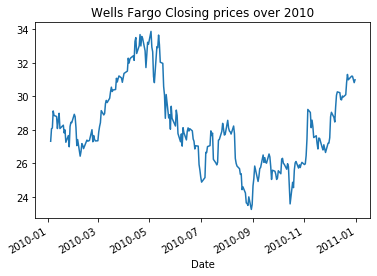

In [97]:
WFC.Close.plot()
plt.title("Wells Fargo Closing prices over 2010")
plt.show()

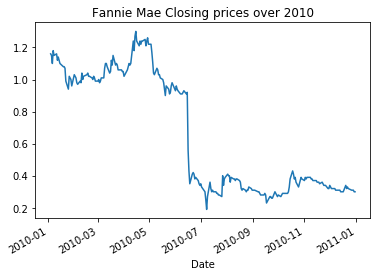

In [98]:
FNMA.Close.plot()
plt.title("Fannie Mae Closing prices over 2010")
plt.show()

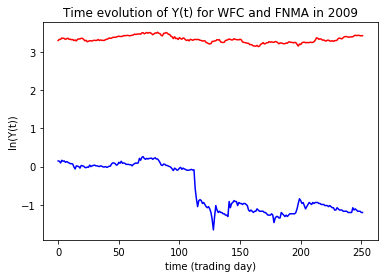

In [99]:
#This will be Sw
WFC = WFC.Close
#This will be Sf
FNMA = FNMA.Close
Yw = []
Yf = []
for i in range(len(WFC)):
    Yw.append(math.log(WFC[i]))
    Yf.append(math.log(FNMA[i]))

plt.plot(Yw, color = 'red')
plt.plot(Yf, color = 'blue')
plt.title("Time evolution of Y(t) for WFC and FNMA in 2009")
plt.ylabel("ln(Y(t))")
plt.xlabel("time (trading day)")
plt.show()

Something to note here is that for the first time we can see that Fannie Mae is on average losing value as each day passes and as time progresses the losses get more significant. They were bailed out in 2008 but I can hypothesize that the crash may have led investors to lose faith in their business model.

In [100]:
#We will now construct Sw and Sf to compute pij values
Sw = []
Sf = []
for i in range(len(WFC)):
    """if i == 0:
        Sw.append(WFC[0])
        Sf.append(FNMA[0])"""
    Sw.append(math.log(WFC[i]) - math.log(WFC[i-1]))
    Sf.append(math.log(FNMA[i]) - math.log(FNMA[i-1]))
    
#Converting to numpy arrays to work with the data easier
Sw = np.array(Sw)
Sf = np.array(Sf)

#Average of each logarithmic Y(t) list
ExpSw = np.mean(Sw)
ExpSf = np.mean(Sf)
print("Expectation of Sw: {}, Expectation of Sf: {}".format(ExpSw, ExpSf))
print()

#Average of the squared values of each logarithmic Y(t) list
ExpSwSq = np.mean(np.power(Sw,2))
ExpSfSq = np.mean(np.power(Sf,2))
print("Expectation of the squared values of Sw: {} and Sf: {}".format(ExpSwSq, ExpSfSq))
print()

#Getting covariance values
SfSw = []
for i in range(len(WFC)):
    SfSw.append(Sf[i]*Sw[i])

#Getting the expectation of the covariance
ExpSfSw = np.mean(SfSw)
print("Expectation of the covariance: ", ExpSfSw)
print()

#Numerator (Variance of the pair as an entity)
num = ExpSfSw - (ExpSw * ExpSf)
#Denominator (Dividing by the standard deviation of each stock)
den = math.sqrt(ExpSwSq - ExpSw**2) * math.sqrt(ExpSfSq - ExpSf**2)
#Combining the two to get pij
pij = num/den
print("Correlation: ", pij)

Expectation of Sw: 0.0, Expectation of Sf: -1.101411730778925e-19

Expectation of the squared values of Sw: 0.0005130536823044859 and Sf: 0.01253600539355191

Expectation of the covariance:  -0.0005081654177257578

Correlation:  -0.20037526833201125


This was mainly for fun. Here we can finally see an Anti-Correlation (of about -20%) for the first time. This is one of the smallest values that has been observed as in the text -30% has been seen. This makes sense from looking at the chart because we can observe that Fannie Mae fell off the proverbial cliff while Wells Fargo was recovering its value. That being said I will probably want to look more into the equity story here because this was strange and interesting.

All in all, I think the safest thing that I can say is that when there aren't times of crisis Fannie Mae and Wells Fargo either have a strong correlation or anti-correlation, which is nice to show that they are linked. Maybe as something helpful I'll attach their Time evolution over 5 years.

In [101]:
#Wells Fargo and FANNIE MAE over a 5 year period 
FNMA = yf.download("FNMA", '2007-01-01','2013-01-01')
WFC = yf.download("WFC", '2007-01-01','2013-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


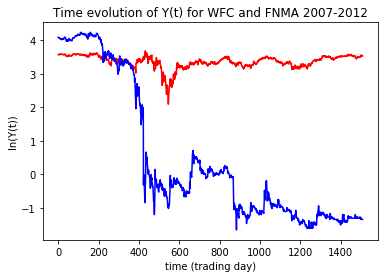

In [102]:
#This will be Sw
WFC = WFC.Close
#This will be Sf
FNMA = FNMA.Close
Yw = []
Yf = []
for i in range(len(WFC)):
    Yw.append(math.log(WFC[i]))
    Yf.append(math.log(FNMA[i]))

plt.plot(Yw, color = 'red')
plt.plot(Yf, color = 'blue')
plt.title("Time evolution of Y(t) for WFC and FNMA 2007-2012")
plt.ylabel("ln(Y(t))")
plt.xlabel("time (trading day)")
plt.show()